# Manual Sentiment Analysis 

In [2]:
punctuation_chars = ["'", '"', ",", ".", "!", ":", ";", '#', '@']
# lists of words to use
positive_words = []
with open("positive_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            positive_words.append(lin.strip())


negative_words = []
with open("negative_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            negative_words.append(lin.strip())

def strip_punctuation(word):
    punctuation_chars = ["'", '"', ",", ".", "!", ":", ";", '#', '@']
    new_word = ""
    for w in word:
        if w in punctuation_chars :
            y= w.replace(w," ")
            new_word = new_word+y
        else:
            new_word = new_word+w
    return new_word

def get_neg(a_string):
    a_string = strip_punctuation(a_string)
    clean_words = a_string.lower().split(' ')
    score = 0
    for i in clean_words:
        if i in negative_words:
            score +=1
    return score 
                     
def get_pos(a_string):
    a_string = strip_punctuation(a_string)
    clean_words = a_string.lower().split(' ')
    score = 0
    for i in clean_words:
        if i in positive_words:
            score +=1
    return score 
                        
            
            
            
            
outfile = open("resulting_data.csv", "w")
outfile.write('Number of Retweets, Number of Replies, Positive Score, Negative Score, Net Score')
outfile.write('\n')

myfile = open('project_twitter_data.csv', 'r')
rows = myfile.readlines()[1:]
for line in rows:
    words = line.split()
    numbers = words[-1]
    twrt = numbers.split(',')
    print ('retweets: ', twrt[1], 'replies: ', twrt[2])
    pos_sco = 0
    neg_sco = 0
    for word in words:
        if word in positive_words:
            pos_sco = pos_sco + 1
        if word in negative_words:
            neg_sco = neg_sco + 1
    net_sco = pos_sco - neg_sco
    print ('positive words: ', pos_sco, 'negative words: ', neg_sco, 'Net score: ', net_sco )
    row_string = '{}, {}, {}, {}, {}'.format(twrt[1], twrt[2], pos_sco, neg_sco, net_sco)
    outfile.write(row_string)
    outfile.write('\n')

FileNotFoundError: [Errno 2] No such file or directory: 'positive_words.txt'

In [26]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

data = pd.read_csv("/Users/jessicaparker/Desktop/Python/Coursera_UM_Twitter.csv")

data


,Number of Retweets,Number of Replies,Positive Score,Negative Score,Net Score
0,3,0,0,0,0
1,1,0,0,2,-2
2,1,2,0,0,0
3,3,1,0,0,0
4,6,0,0,0,0
5,9,5,0,0,0
6,19,0,0,0,0
7,0,0,0,3,-3
8,0,0,0,2,-2
9,82,2,0,0,0


ValueError: x and y must be the same size

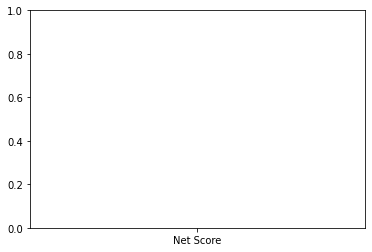

In [25]:
plt.scatter(x = "Net Score", y = "Number of Retweets", data = data)